# Multinomial Regression

#### Classify customers based on past loan applicants. Perform multinomial regression on the loan status category. ('Fully Paid', 'Charged Off', 'Current')

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
loan_df = pd.read_csv(r"D:\360digi\DS\Sharath\Multinomial_Regression_E_Learning\handson\Datasets_Multinomial\loan.csv")
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan_df.drop(['id','member_id'], axis = 1, inplace = True)

In [6]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [8]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [9]:
# Current : 1140,  has the least count

In [9]:
loan_df.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 109, dtype: int64

In [10]:
# To drop NaN values
df = loan_df.dropna(axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   home_ownership           39717 non-null  object 
 9   annual_inc               39717 non-null  float64
 10  verification_status      39717 non-null  object 
 11  issue_d                  39717 non-null  object 
 12  loan_status              39717 non-null  object 
 13  pymnt_plan               39717 non-null  object 
 14  url                   

In [12]:
## Auto EDA ## 
import dtale

d = dtale.show(df)
d.open_browser()

In [11]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

In [12]:
# Based on the Auto EDA analysis, we consider few columns with low correlation
df_new1 = df[['loan_status', 'loan_amnt', 'delinq_2yrs', 'annual_inc',  'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'out_prncp', 'total_rec_late_fee', 'collection_recovery_fee' ]]
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_status              39717 non-null  object 
 1   loan_amnt                39717 non-null  int64  
 2   delinq_2yrs              39717 non-null  int64  
 3   annual_inc               39717 non-null  float64
 4   inq_last_6mths           39717 non-null  int64  
 5   open_acc                 39717 non-null  int64  
 6   pub_rec                  39717 non-null  int64  
 7   revol_bal                39717 non-null  int64  
 8   out_prncp                39717 non-null  float64
 9   total_rec_late_fee       39717 non-null  float64
 10  collection_recovery_fee  39717 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 3.3+ MB


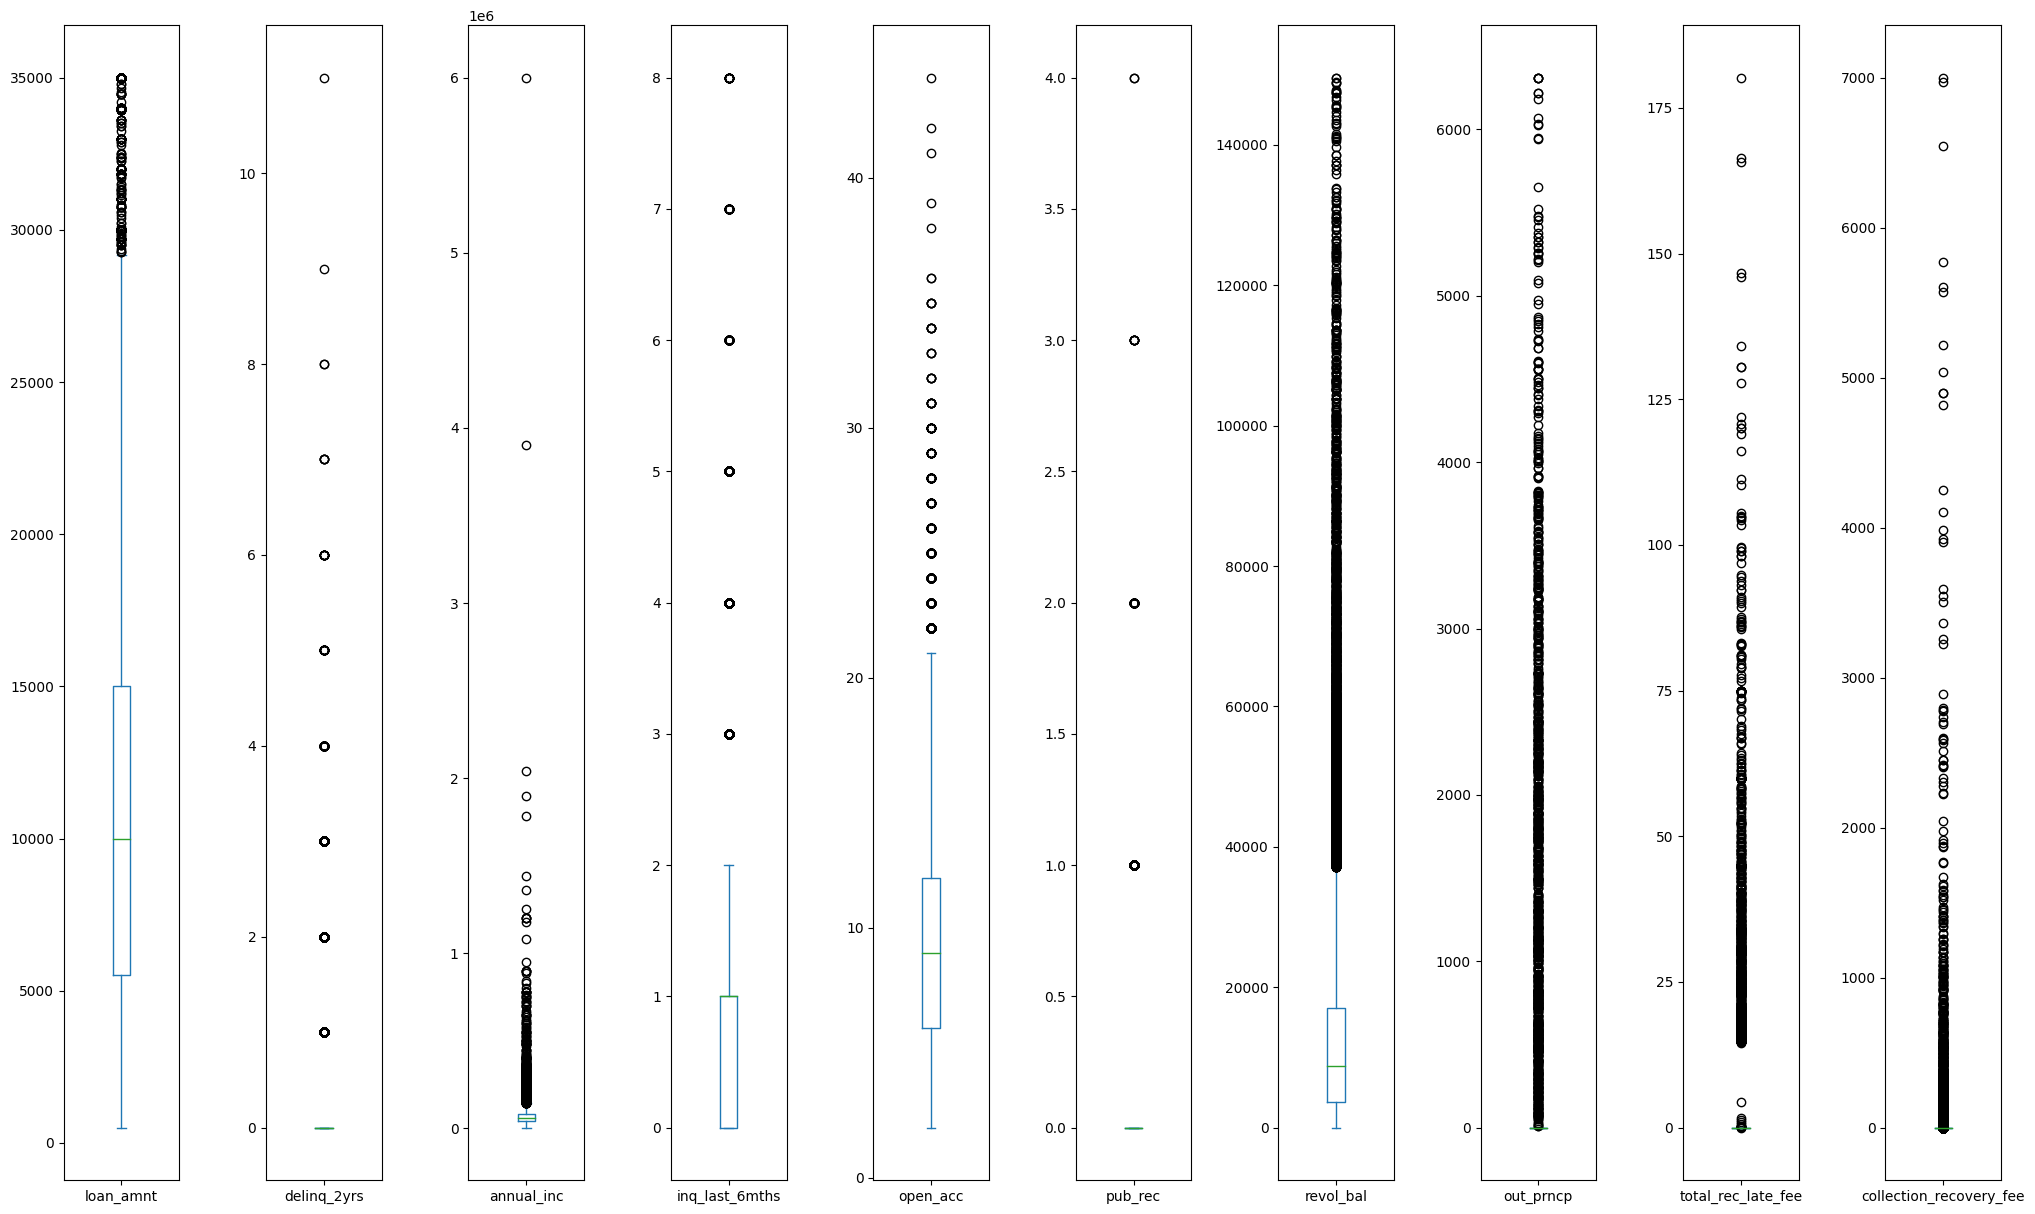

In [13]:
# box plot visualisation
df_new1.plot(kind = 'box', subplots = True, sharey = False, figsize = (25,15))
plt.subplots_adjust(wspace = 0.75)
plt.show()

array([[<AxesSubplot:title={'center':'annual_inc'}, xlabel='[loan_status]'>,
        <AxesSubplot:title={'center':'collection_recovery_fee'}, xlabel='[loan_status]'>,
        <AxesSubplot:title={'center':'delinq_2yrs'}, xlabel='[loan_status]'>],
       [<AxesSubplot:title={'center':'inq_last_6mths'}, xlabel='[loan_status]'>,
        <AxesSubplot:title={'center':'loan_amnt'}, xlabel='[loan_status]'>,
        <AxesSubplot:title={'center':'open_acc'}, xlabel='[loan_status]'>],
       [<AxesSubplot:title={'center':'out_prncp'}, xlabel='[loan_status]'>,
        <AxesSubplot:title={'center':'pub_rec'}, xlabel='[loan_status]'>,
        <AxesSubplot:title={'center':'revol_bal'}, xlabel='[loan_status]'>],
       [<AxesSubplot:title={'center':'total_rec_late_fee'}, xlabel='[loan_status]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

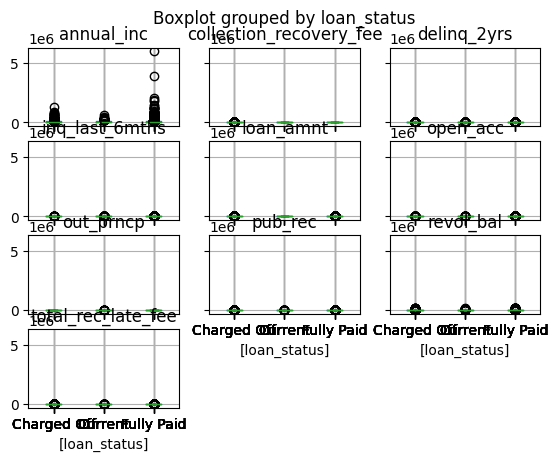

In [14]:
# Visualization
df_new1.boxplot(by = "loan_status")

In [15]:
# Correlation Analysis on Original Data
org_corr = df.corr()
org_corr

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt
loan_amnt,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,0.177168,-0.051236,...,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,NaN,NaN,NaN
funded_amnt,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,0.175530,-0.052169,...,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,NaN,NaN,NaN
funded_amnt_inv,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,0.163027,-0.053214,...,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,NaN,NaN,NaN
installment,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,0.172812,-0.046532,...,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,NaN,NaN,NaN
annual_inc,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,0.158200,-0.018689,...,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,NaN,NaN,NaN
dti,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,0.288045,-0.004621,...,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,NaN,NaN,NaN
delinq_2yrs,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,0.011656,0.007463,...,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,NaN,NaN,NaN
inq_last_6mths,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,0.091713,0.024802,...,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514,NaN,NaN,NaN
open_acc,0.177168,0.175530,0.163027,0.172812,0.158200,0.288045,0.011656,0.091713,1.000000,0.000172,...,0.152937,0.160631,0.124499,-0.018627,0.016396,0.006219,0.078865,NaN,NaN,NaN
pub_rec,-0.051236,-0.052169,-0.053214,-0.046532,-0.018689,-0.004621,0.007463,0.024802,0.000172,1.000000,...,-0.054101,-0.065384,-0.007470,-0.002071,-0.005521,-0.005536,-0.032214,NaN,NaN,NaN


In [16]:
new_cr = df_new1.corr()
new_cr

,loan_amnt,delinq_2yrs,annual_inc,inq_last_6mths,open_acc,pub_rec,revol_bal,out_prncp,total_rec_late_fee,collection_recovery_fee
loan_amnt,1.000000,-0.031864,0.271149,0.009229,0.177168,-0.051236,0.317597,0.192937,0.044706,0.072853
delinq_2yrs,-0.031864,1.000000,0.023083,0.008091,0.011656,0.007463,-0.055125,-0.003008,0.030609,0.013912
annual_inc,0.271149,0.023083,1.000000,0.033908,0.158200,-0.018689,0.279961,0.033573,0.006243,0.015604
inq_last_6mths,0.009229,0.008091,0.033908,1.000000,0.091713,0.024802,-0.022381,-0.012106,0.031215,0.012420
open_acc,0.177168,0.011656,0.158200,0.091713,1.000000,0.000172,0.288964,0.028688,-0.018627,0.006219
pub_rec,-0.051236,0.007463,-0.018689,0.024802,0.000172,1.000000,-0.061413,-0.012675,-0.002071,-0.005536
revol_bal,0.317597,-0.055125,0.279961,-0.022381,0.288964,-0.061413,1.000000,0.060388,0.003823,0.022400
out_prncp,0.192937,-0.003008,0.033573,-0.012106,0.028688,-0.012675,0.060388,1.000000,-0.004644,-0.011394
total_rec_late_fee,0.044706,0.030609,0.006243,0.031215,-0.018627,-0.002071,0.003823,-0.004644,1.000000,0.093178
collection_recovery_fee,0.072853,0.013912,0.015604,0.012420,0.006219,-0.005536,0.022400,-0.011394,0.093178,1.000000


In [17]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_status              39717 non-null  object 
 1   loan_amnt                39717 non-null  int64  
 2   delinq_2yrs              39717 non-null  int64  
 3   annual_inc               39717 non-null  float64
 4   inq_last_6mths           39717 non-null  int64  
 5   open_acc                 39717 non-null  int64  
 6   pub_rec                  39717 non-null  int64  
 7   revol_bal                39717 non-null  int64  
 8   out_prncp                39717 non-null  float64
 9   total_rec_late_fee       39717 non-null  float64
 10  collection_recovery_fee  39717 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 3.3+ MB


In [18]:
# Seperating input and output variables 
#X1 = pd.DataFrame(df.iloc[:, 0:12])
#X2 = pd.DataFrame(df.iloc[:, 13:])
X = pd.DataFrame(df_new1.iloc[:, 1:])
Y = pd.DataFrame(df_new1.iloc[:, 0])

In [19]:
#X = pd.concat([X1, X2], axis = 1)  # concatenated data will have new sequential index
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   loan_status  39717 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [20]:
X.isnull().sum()

loan_amnt                  0
delinq_2yrs                0
annual_inc                 0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
out_prncp                  0
total_rec_late_fee         0
collection_recovery_fee    0
dtype: int64

In [21]:
# Select numeric features for data preprocessing
numeric_features = X.select_dtypes(exclude = ['object']).columns
print(numeric_features)

Index(['loan_amnt', 'delinq_2yrs', 'annual_inc', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'out_prncp', 'total_rec_late_fee',
       'collection_recovery_fee'],
      dtype='object')


In [22]:
categorical_features = X.select_dtypes(include = ['object']).columns
print(categorical_features)

Index([], dtype='object')


In [ ]:
# ['delinq_2yrs', 'pub_rec', 'out_prncp', 'collection_recovery_fee', 'total_rec_late_fee'] have low variation for method 'iqr'.

In [23]:
# Winsorization for "annual_inc" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['annual_inc'])

X['annual_inc'] = winsor.fit_transform(X[['annual_inc']])

In [24]:
# Winsorization for "inq_last_6mths" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['inq_last_6mths'])

X['inq_last_6mths'] = winsor.fit_transform(X[['inq_last_6mths']])

In [25]:
# Winsorization for "open_acc" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['open_acc'])

X['open_acc'] = winsor.fit_transform(X[['open_acc']])

In [26]:
# Winsorization for "revol_bal" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['revol_bal'])

X['revol_bal'] = winsor.fit_transform(X[['revol_bal']])

In [49]:
X.describe()

,loan_amnt,delinq_2yrs,annual_inc,inq_last_6mths,open_acc,pub_rec,revol_bal,out_prncp,total_rec_late_fee,collection_recovery_fee
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,0.146512,65247.891522,0.797643,9.246167,0.055065,11916.299255,51.227887,1.363015,12.406112
std,7456.670694,0.491812,32703.476426,0.892869,4.232041,0.237200,10515.870315,375.172839,7.289979,148.671593
min,500.000000,0.000000,4000.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,0.000000,40404.000000,0.000000,6.000000,0.000000,3703.000000,0.000000,0.000000,0.000000
50%,10000.000000,0.000000,59000.000000,1.000000,9.000000,0.000000,8850.000000,0.000000,0.000000,0.000000
75%,15000.000000,0.000000,82300.000000,1.000000,12.000000,0.000000,17058.000000,0.000000,0.000000,0.000000
max,35000.000000,11.000000,145144.000000,2.500000,21.000000,4.000000,37090.500000,6311.470000,180.200000,7002.190000


In [27]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(X)

In [28]:
scaled_data = pd.DataFrame(scale.transform(X), columns = numeric_features)
scaled_data.describe()

,loan_amnt,delinq_2yrs,annual_inc,inq_last_6mths,open_acc,pub_rec,revol_bal,out_prncp,total_rec_late_fee,collection_recovery_fee
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,0.310709,0.013319,0.433939,0.319057,0.381377,0.013766,0.321276,0.008117,0.007564,0.001772
std,0.216135,0.044710,0.231703,0.357147,0.222739,0.059300,0.283519,0.059443,0.040455,0.021232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144928,0.000000,0.257921,0.000000,0.210526,0.000000,0.099837,0.000000,0.000000,0.000000
50%,0.275362,0.000000,0.389673,0.400000,0.368421,0.000000,0.238606,0.000000,0.000000,0.000000
75%,0.420290,0.000000,0.554753,0.400000,0.526316,0.000000,0.459902,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  float64
 1   delinq_2yrs              39717 non-null  float64
 2   annual_inc               39717 non-null  float64
 3   inq_last_6mths           39717 non-null  float64
 4   open_acc                 39717 non-null  float64
 5   pub_rec                  39717 non-null  float64
 6   revol_bal                39717 non-null  float64
 7   out_prncp                39717 non-null  float64
 8   total_rec_late_fee       39717 non-null  float64
 9   collection_recovery_fee  39717 non-null  float64
dtypes: float64(10)
memory usage: 3.0 MB


In [30]:
# Splitting data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, test_size = 0.2, random_state = 0, stratify = Y)

# Multinomial Regression

In [31]:
# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
logmodel = LogisticRegression(multi_class = "multinomial", solver = "newton-cg")

In [32]:
# Train the model
model = logmodel.fit(X_train, Y_train.loan_status)

In [33]:
# Train accuracy 
train_predict = model.predict(X_train)

In [34]:
# Train predictions
accuracy_score(Y_train.loan_status, train_predict) 

0.8579926352563497

In [35]:
# Predict the results for Test Data
test_predict = model.predict(X_test)

In [36]:
# Test accuracy 
accuracy_score(Y_test.loan_status, test_predict)

0.8587613293051359

### Hyperparameter Optimization

In [37]:
# Hyperparameter Optimization
logmodel1 = LogisticRegression(multi_class = "multinomial")

In [38]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [39]:
# from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logmodel1, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, Y_train.loan_status)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


In [40]:
# Best estimator
best_clf.best_estimator_

LogisticRegression(C=0.0001, max_iter=1000, multi_class='multinomial',
                   penalty='none', solver='newton-cg')

In [41]:
print (f'Accuracy - : {best_clf.score(X_train, Y_train):.3f}')

Accuracy - : 0.953


In [42]:
print (f'Accuracy - : {best_clf.score(X_test, Y_test):.3f}')

Accuracy - : 0.955


In [43]:
# Fitting on Full data
best_clf1 = clf.fit(scaled_data, Y)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


In [44]:
best_clf1.best_estimator_

LogisticRegression(C=0.0001, max_iter=1000, multi_class='multinomial',
                   penalty='none', solver='newton-cg')

In [47]:
print (f'Accuracy - : {best_clf1.score(scaled_data, Y):.3f}')

Accuracy - : 0.953


In [46]:
print (f'Accuracy - : {best_clf1.score(X_test, Y_test):.3f}')

Accuracy - : 0.955
